In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
import pylab as plt

In [2]:
df = pd.read_csv ('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz

C:\Users\cagat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


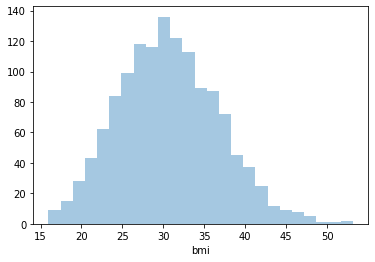

In [4]:
sns.distplot(df.bmi, kde = False);


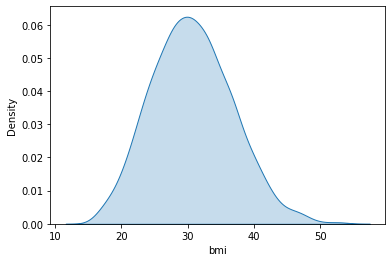

In [5]:
sns.kdeplot(df.bmi, shade = True);

## “smoker” ile “charges” arasındaki ilişkiyi inceleyiniz

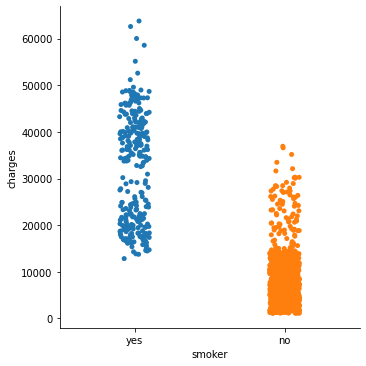

In [6]:
sns.catplot(x = df.smoker, y = df.charges, data = df);

## “smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.


In [52]:
print("Smokers rate in northwest : ", df[df.region == "northwest"][df.smoker == 'yes'].smoker.count() / df[df.region == "northwest"].smoker.count() * 100)
print("Smokers rate in northeast : ", df[df.region == "northeast"][df.smoker == "yes"].smoker.count() / df[df.region == "northeast"].smoker.count() * 100)
print("Smokers rate in southwest : ", df[df.region == "southwest"][df.smoker == "yes"].smoker.count() / df[df.region == "southwest"].smoker.count() * 100)
print("Smokers rate in southeast : ", df[df.region == "southeast"][df.smoker == "yes"].smoker.count() / df[df.region == "southeast"].smoker.count() * 100)

Smokers rate in northwest :  17.846153846153847
Smokers rate in northeast :  20.679012345679013
Smokers rate in southwest :  17.846153846153847
Smokers rate in southeast :  25.0


<ipython-input-52-44da2e84042a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Smokers rate in northwest : ", df[df.region == "northwest"][df.smoker == 'yes'].smoker.count() / df[df.region == "northwest"].smoker.count() * 100)
<ipython-input-52-44da2e84042a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Smokers rate in northeast : ", df[df.region == "northeast"][df.smoker == "yes"].smoker.count() / df[df.region == "northeast"].smoker.count() * 100)
<ipython-input-52-44da2e84042a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Smokers rate in southwest : ", df[df.region == "southwest"][df.smoker == "yes"].smoker.count() / df[df.region == "southwest"].smoker.count() * 100)
<ipython-input-52-44da2e84042a>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Smokers rate in southeast : ", df[df.region == "southeast"][df.smoker == "ye

In [8]:
northwest = df[df.region == "northwest"][df.smoker == "yes"].smoker.count() / df.smoker.count() * 100
northeast = df[df.region == "northeast"][df.smoker == "yes"].smoker.count() / df.smoker.count() * 100
southwest = df[df.region == "southwest"][df.smoker == "yes"].smoker.count() / df.smoker.count() * 100
southeast = df[df.region == "southeast"][df.smoker == "yes"].smoker.count() / df.smoker.count() * 100

<ipython-input-8-91cd6f18c48b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  northwest = df[df.region == "northwest"][df.smoker == "yes"].smoker.count() / df.smoker.count() * 100
<ipython-input-8-91cd6f18c48b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  northeast = df[df.region == "northeast"][df.smoker == "yes"].smoker.count() / df.smoker.count() * 100
<ipython-input-8-91cd6f18c48b>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  southwest = df[df.region == "southwest"][df.smoker == "yes"].smoker.count() / df.smoker.count() * 100
<ipython-input-8-91cd6f18c48b>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  southeast = df[df.region == "southeast"][df.smoker == "yes"].smoker.count() / df.smoker.count() * 100


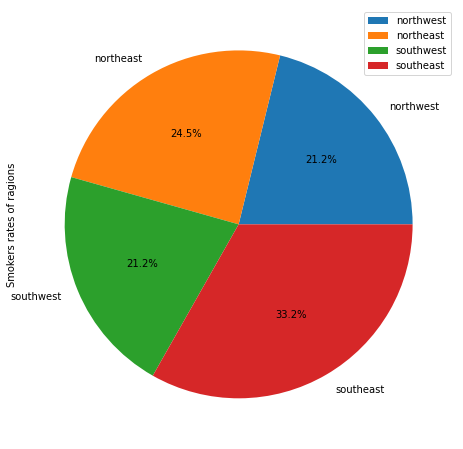

In [9]:
tmp_df = pd.DataFrame({'Smokers rates of ragions': [northwest, northeast , southwest , southeast]},
                  index=['northwest', 'northeast', 'southwest' , 'southeast'])
plot = tmp_df.plot.pie(y='Smokers rates of ragions', figsize=(8, 8),autopct='%.1f%%')

## “bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.

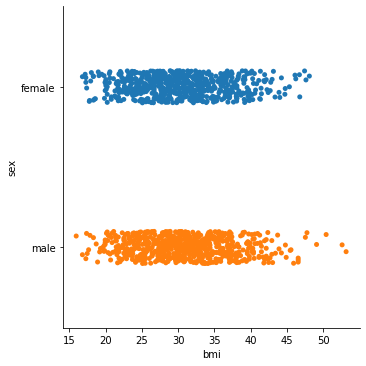

In [10]:
sns.catplot(x = df.bmi, y = df.sex, data = df);

In [11]:
print("Avg of males bmi : ", np.average(df[df.sex == "male"].bmi))
print("Avg of females bmi : ", np.average(df[df.sex == "female"].bmi))

Avg of males bmi :  30.943128698224854
Avg of females bmi :  30.37774924471299


In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## En çok “children”’a sahip “region”’ı bulunuz.

In [13]:
chd_northwest = np.sum(df[df.region == "northwest"].children)
chd_northeast = np.sum(df[df.region == "northeast"].children)
chd_southwest = np.sum(df[df.region == "southwest"].children)
chd_southeast = np.sum(df[df.region == "southeast"].children)

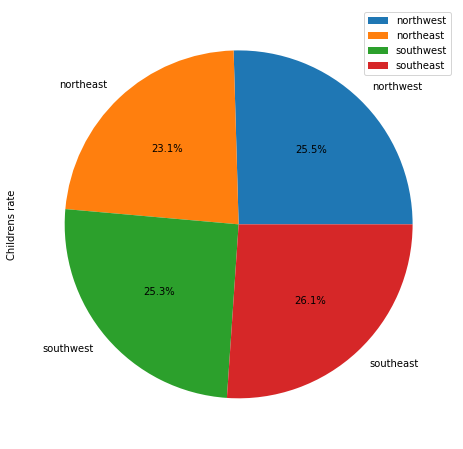

In [14]:
tmp_df = pd.DataFrame({'Childrens rate': [chd_northwest, chd_northeast , chd_southwest , chd_southeast]},
                  index=['northwest', 'northeast', 'southwest' , 'southeast'])
plot = tmp_df.plot.pie(y='Childrens rate', figsize=(8, 8),autopct='%.1f%%')

## Age” ile “bmi” arasındaki ilişkiyi inceleyiniz

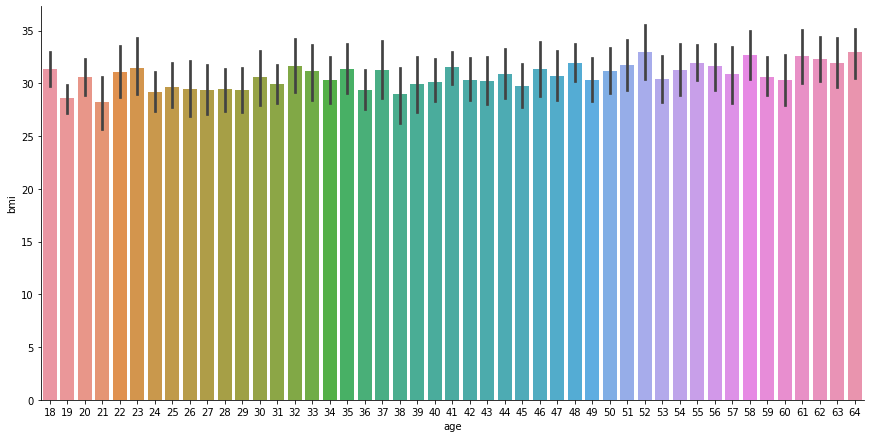

In [33]:
sns.catplot(x = df.age, y = df.bmi,
               height=6,  aspect=2,
               kind='bar', 
               data= df);

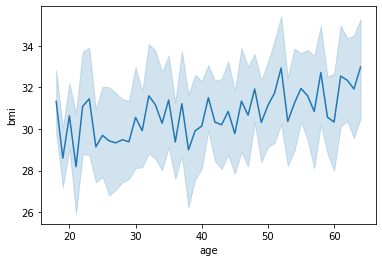

In [39]:
sns.lineplot(x = df.age, y = df.bmi,
            data= df);

## “bmi” ile “children” arasındaki ilişkiyi inceleyiniz.

In [46]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
